# 01 - Data Preprocessing & Cleaning
This notebook loads the Heart Disease UCI dataset, handles missing values, encodes categorical variables, scales numerical features, and performs basic EDA.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Paths
DATA_PATH = '../data/processed.cleveland.data'
OUTPUT_PATH = '../data/heart_disease.csv'

In [8]:
# Column names as per dataset description
COLUMNS = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'
]

# Load data
df = pd.read_csv(DATA_PATH, header=None, names=COLUMNS, na_values=['?'])
print('Dataset shape:', df.shape)
df.head()

Dataset shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [10]:
# Check missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [11]:
# Define feature types
NUMERIC_FEATURES = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
CATEGORICAL_FEATURES = ['cp', 'restecg', 'slope', 'ca', 'thal']
BINARY_FEATURES = ['sex', 'fbs', 'exang']

# Preprocessing pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, NUMERIC_FEATURES + BINARY_FEATURES),
    ('cat', categorical_transformer, CATEGORICAL_FEATURES)
])

# Fit and transform
X_processed = preprocessor.fit_transform(df.drop('num', axis=1))
y = (df['num'] > 0).astype(int)


# Create a DataFrame from the processed data for inspection and saving
# Get feature names after one-hot encoding
cat_features_out = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(CATEGORICAL_FEATURES)
new_columns = NUMERIC_FEATURES + BINARY_FEATURES + list(cat_features_out)

X_clean = pd.DataFrame(X_processed, columns=new_columns)
X_clean['target'] = y.values
X_clean.to_csv(OUTPUT_PATH, index=False)
print('Cleaned data saved to:', OUTPUT_PATH)

Cleaned data saved to: ../data/heart_disease.csv


Class distribution:
0    164
1    139
Name: num, dtype: int64


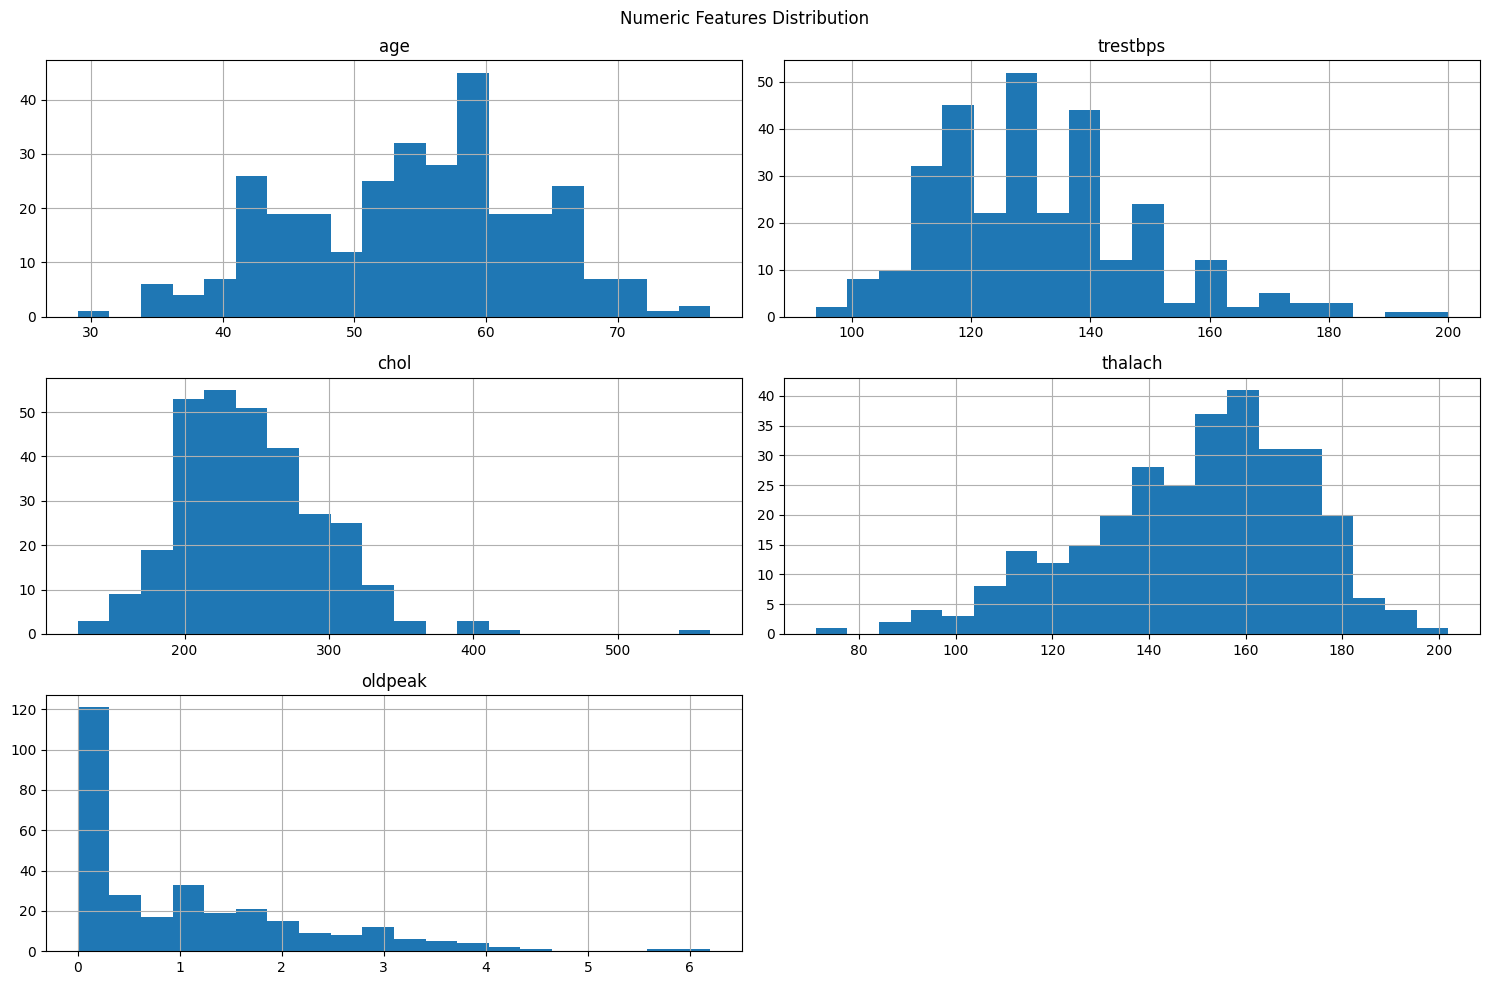

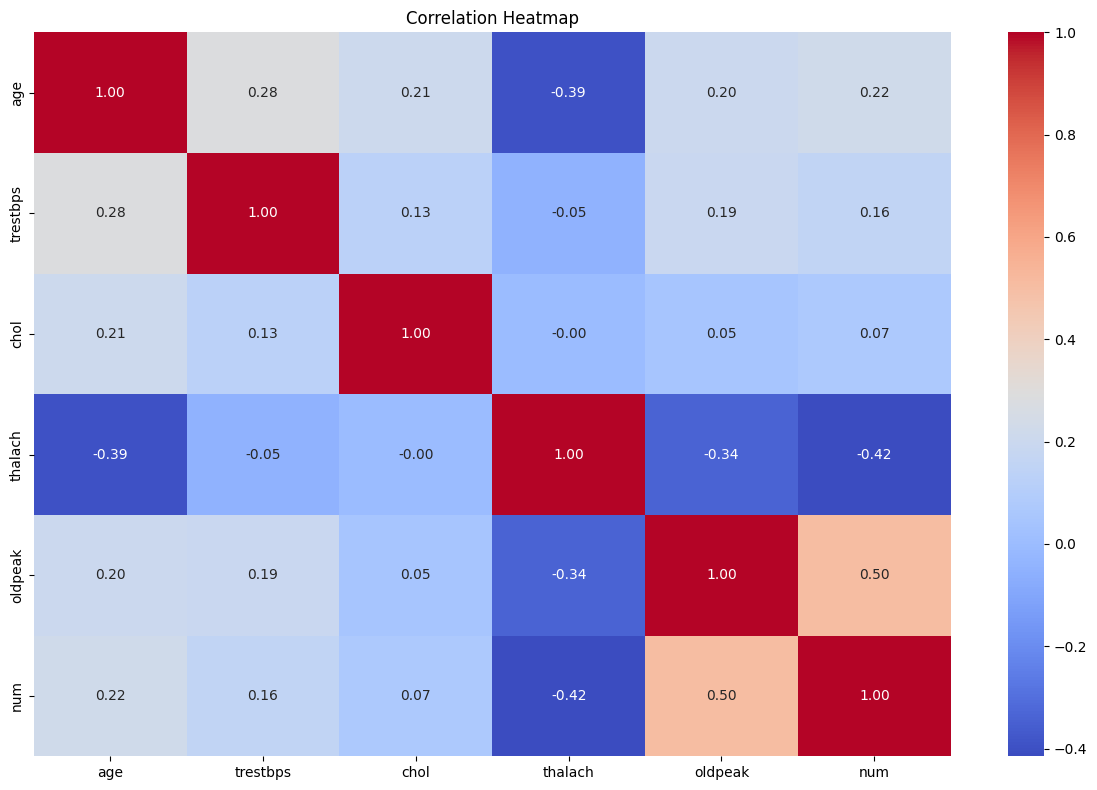

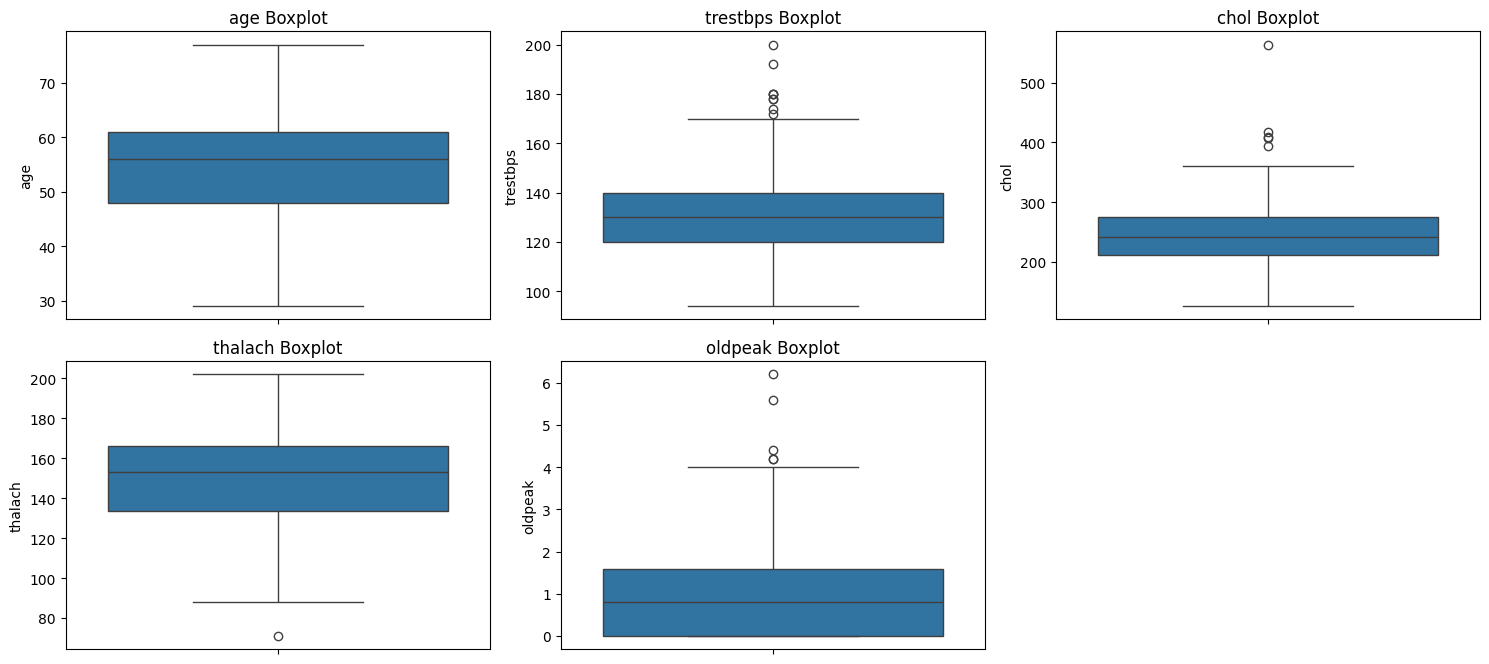

In [12]:
# Quick EDA
print('Class distribution:')
print(y.value_counts())

# Histograms
df[NUMERIC_FEATURES].hist(bins=20, figsize=(15, 10))
plt.suptitle('Numeric Features Distribution')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
numeric_df = df[NUMERIC_FEATURES + ['num']]
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(NUMERIC_FEATURES, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()